-20.077515232286068


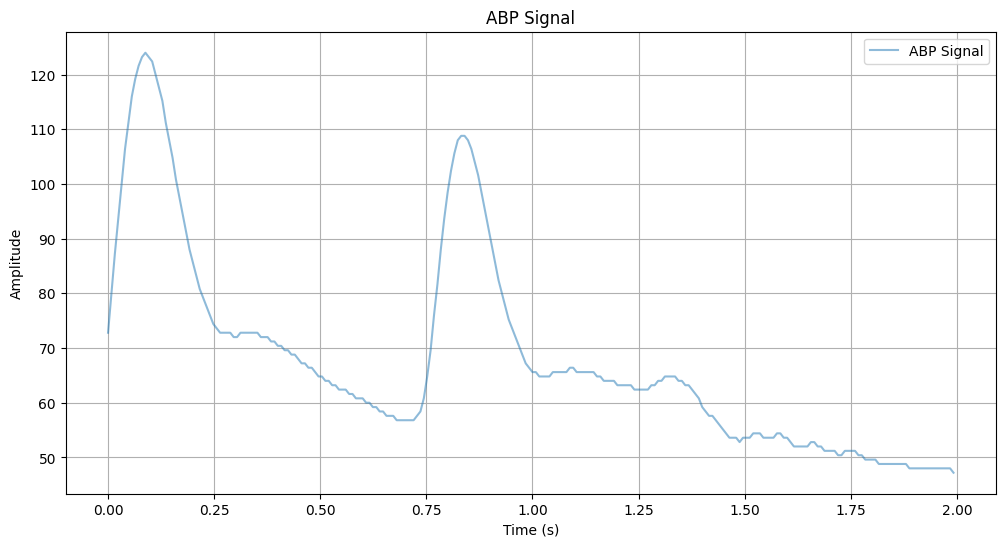

In [1]:

import wfdb
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np

# Function to design a bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    """
    Applies a Butterworth bandpass filter to the signal.
    Args:
        data: The signal to filter.
        lowcut: Lower cutoff frequency (Hz).
        highcut: Upper cutoff frequency (Hz).
        fs: Sampling frequency (Hz).
        order: Filter order (default=4).
    Returns:
        Filtered signal.
    """
    nyquist = 0.5 * fs  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Load the record

sampleFreq = 125
duration = 2
signals, fields = wfdb.rdsamp('3544749_0005', sampto = int(duration * sampleFreq))


# Extract channel 2 (ensure it's valid)
channel_index = 2
if channel_index >= signals.shape[1]:
    raise IndexError("Channel index out of bounds. Check the signal dimensions.")

# Extract the signal and metadata
raw_signal = signals[:, channel_index]
fs = fields['fs']  # Sampling frequency
baseline = 0  # Adjust the baseline if necessary
adjusted_signal = raw_signal - baseline

# Design and apply the bandpass filter
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 3  # Upper cutoff frequency in Hz
filtered_signal = bandpass_filter(adjusted_signal, lowcut, highcut, fs)

# Time axis for plotting
time_axis = np.arange(len(filtered_signal)) / fs

# Plot the raw and filtered signals
  # Duration to display in seconds
duration = 10
samplesNumber = int(duration * fs)

print(np.min( filtered_signal[:samplesNumber]))

filtered_signal = filtered_signal - (-31)

plt.figure(figsize=(12, 6))
plt.plot(time_axis[:samplesNumber], adjusted_signal[:samplesNumber], label='ABP Signal', alpha=0.5)
#plt.plot(time_axis[:samplesNumber], filtered_signal[:samplesNumber], label='Filtered Signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('ABP Signal')
plt.legend()
plt.grid(True)
plt.show()

#upload 3544749_0005.dat and 3544749_0005.hea



In [2]:
# convert mmhg to raw ideal voltage
def mmHg2mv(mmHg):
    return mmHg * 2


def mv2mmHg(mv):
    return mv / 2

print(mv2mmHg(240))
print(mmHg2mv(45))

120.0
90


Text(0.5, 1.0, 'Raw Ideal Voltage')

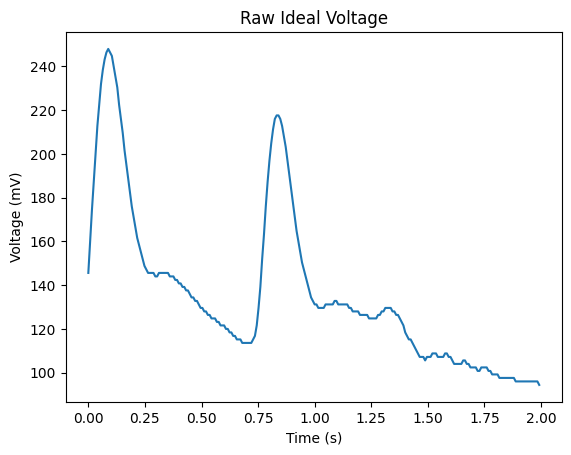

In [3]:



fs = 125

samplesNumber = int(duration * fs)

def convert2voltage(signal):
  PressureSensitivity = 0.002 # 2mv per mmhg
  offset_voltage = 0
  return signal * PressureSensitivity + offset_voltage


rawIdealVoltage = convert2voltage(adjusted_signal)

plt.plot(time_axis[:samplesNumber],rawIdealVoltage[:samplesNumber]*1000)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Raw Ideal Voltage")

Text(0, 0.5, 'Amplitude')

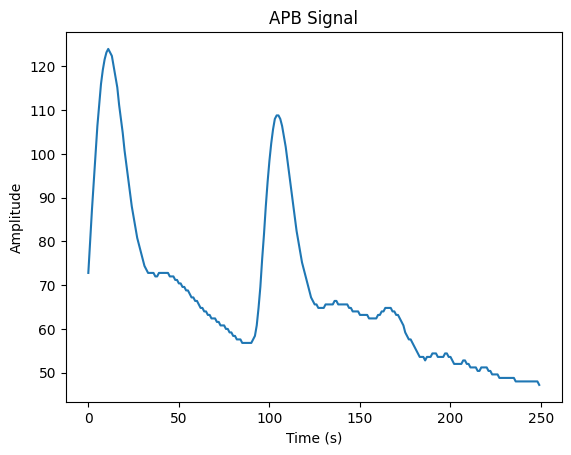

In [4]:
plt.plot(adjusted_signal[:samplesNumber])
plt.title("APB Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

In [5]:
#add noise and 60 hertz to raw ideal voltage

#noisy signal with unifor noise, mains noise and gaussian noise
def getNoisySIgnal(originalSignal):
  # gaussian_noise_std = 0.005  # Standard deviation of Gaussian noise
  # fs = 125

  # uniform_noise_min = 0.010  # Minimum of uniform noise
  # uniform_noise_max = 0.01   # Maximum of uniform noise
  # print("len of oringial signal = ",len(originalSignal))






  # mains_frequency = 50  # Mains frequency in Hz (use 60 Hz if that's your mains frequency)
  # mains_amplitude = 0.005  # Amplitude of the mains noise (adjust as needed)



  gaussian_noise_std = 0.015  # Standard deviation of Gaussian noise
  fs = 125

  uniform_noise_min = 0.001  # Minimum of uniform noise
  uniform_noise_max = 0.015  # Maximum of uniform noise
  print("len of oringial signal = ",len(originalSignal))






  mains_frequency = 50  # Mains frequency in Hz (use 60 Hz if that's your mains frequency)
  mains_amplitude = 0.015  # Amplitude of the mains noise (adjust as needed)



  time_axis = np.arange(len(originalSignal)) / fs
  mains_noise = mains_amplitude * np.sin(2 * np.pi * mains_frequency * time_axis)



  gaussian_noise = np.random.normal(0, gaussian_noise_std, size=len(time_axis))
  uniform_noise = np.random.uniform(uniform_noise_min, uniform_noise_max, size=len(time_axis))

  return originalSignal + gaussian_noise + uniform_noise + mains_noise

# noisySignal = getNoisySIgnal(rawIdealVoltage)

# plt.plot(1000*noisySignal)
# plt.title("Noisy Signal")
# plt.xlabel("Time (s)")
# plt.ylabel("Amplitude(mv)")


In [6]:
# apply bandpass filter
# apply notch filter for 50 hertz


************************************* signal [ 0 ] =  [-0.11627907 -0.1        72.8        27.6       ]
******************************* fileds =  {'fs': 125, 'sig_len': 125000, 'n_sig': 4, 'base_date': None, 'base_time': datetime.time(17, 48, 34, 810000), 'units': ['mV', 'mV', 'mmHg', 'mmHg'], 'sig_name': ['II', 'AVF', 'ABP', 'PAP'], 'comments': []}
len of oringial signal =  125000


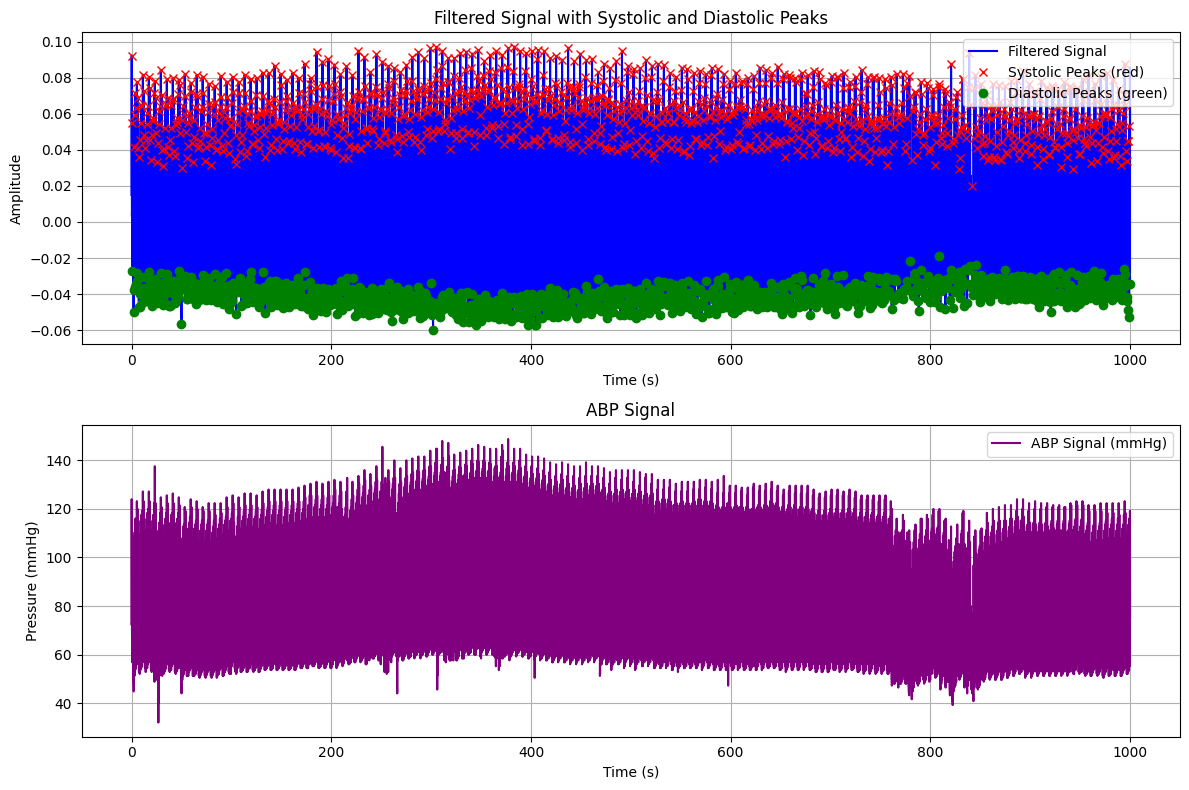

Filtered Signal Length: 125000, ABP Signal Length: 125000
raw abp peaks =  [    11    104    281 ... 124793 124887 124981]
systolic peAKS TIME INFO =  [    11    104    281 ... 124793 124887 124981]
diastolic_points peAKS TIME INFO =  [    78    254    350 ... 124763 124859 124953]
[{'heart_rate': np.float64(42.37288135593221), 'systolic_peak': np.float64(53.11011341982215), 'dicrotic_peak': np.float64(-4.559373301043131), 'diastolic_point1': np.float64(-27.016172877597967), 'diastolic_point2': np.float64(-49.6688241431825), 'dicrotic_notch': np.float64(-10.717638256369373), 'max_slope': np.float64(0.5852982289169328), 'augmentation_index': np.float64(-11.648555604708038), 'T1': np.float64(208.0), 'T2': np.float64(440.0), 'T3': np.float64(760.0), 'systolic_peak_time': np.float64(0.832), 'dicrotic_peak_time': np.float64(1.272), 'systolic_ref_mmHg': np.float64(108.8), 'diastolic_ref_mmHg': np.float64(62.4)}, {'heart_rate': np.float64(76.53061224489795), 'systolic_peak': np.float64(36.809

In [7]:
import wfdb
import numpy as np
import pandas as pd
from scipy import signal
import os
from datetime import datetime

class WaveformProcessor:
    def __init__(self, fs=125):
        self.fs = fs
        self.conversion_factor = 1.25  # mmHg/unit
        self.pressure_sensitivity = 0.002  # mV/mmHg
        if(os.path.exists("/content/processed_features.csv")):
          os.remove("/content/processed_features.csv")
          print("removed old processed features file")

    def load_waveform(self, file_path, channel=1):
        """Load ABP waveform from MIMIC-III dataset"""
        sampleFreq = 125
        duration = 1000
        signals, fields = wfdb.rdsamp(file_path, sampto = int(duration * sampleFreq))


        # Extract channel 2 (ensure it's valid)
        channel_index = 2
        if channel_index >= signals.shape[1]:
            raise IndexError("Channel index out of bounds. Check the signal dimensions.")

        # Extract the signal and metadata
        print("************************************* signal [ 0 ] = ",signals[0])
        print("******************************* fileds = ",fields)
        raw_signal = signals[:, channel_index]

        abp_signal = raw_signal
        raw_voltage = convert2voltage(raw_signal)

        noisyVolatge = getNoisySIgnal(raw_voltage)
        #noisyVolatge = raw_voltage

        # plt.figure()
        # plt.plot(noisyVolatge)
        # plt.title("noisyVolatge Signal")
        # plt.xlabel("Time (s)")
        # plt.ylabel("Amplitude")

        return noisyVolatge,abp_signal

    def convert_to_voltage(self, abp_signal):
        """Convert ABP signal to piezoelectric sensor equivalent"""
        return abp_signal * self.conversion_factor * self.pressure_sensitivity

    def apply_filters(self, signal_data):
        """Apply required filters to the signal"""
        if len(signal_data) < 30:
            raise ValueError(f"Signal length ({len(signal_data)}) is too short for filtering")

        # Low-pass filter with a cutoff frequency of 3 Hz
        nyquist = self.fs / 2
        cutoff = 5 / nyquist  # Normalize cutoff frequency to Nyquist frequency
        b, a = signal.butter(2, cutoff, btype='low')
        return signal.filtfilt(b, a, signal_data)


    def extract_features(self, signal_data,abp_signal):

        print(f"Filtered Signal Length: {len(signal_data)}, ABP Signal Length: {len(abp_signal)}")

        # Find systolic peaks (first peaks in waveform)
        import numpy as np
        from scipy.signal import find_peaks

        def find_aligned_peaks(filtered_signal, abp_signal, fs, margin=15):
            # Step 1: Find systolic peaks in the filtered signal
            filtered_peaks, _ = find_peaks(filtered_signal, prominence=0.01, distance=int(0.25 * fs))

            # Step 2: Search for matching peaks in the ABP signal within ±15 samples
            abp_peaks, _ = find_peaks(abp_signal, prominence=30, distance=int(0.25 * fs))
            print("raw abp peaks = ",abp_peaks)
            aligned_peaks = []

            for peak in filtered_peaks:
                # Define the search range
                start_idx = max(0, peak - margin)
                end_idx = min(len(abp_signal), peak + margin)

                # Find ABP peaks within this range
                nearby_peaks = [p for p in abp_peaks if start_idx <= p <= end_idx]
                if nearby_peaks:
                    # Select the ABP peak closest to the filtered peak
                    closest_peak = min(nearby_peaks, key=lambda x: abs(x - peak))
                    aligned_peaks.append(closest_peak)

            return np.array(aligned_peaks), abp_peaks

        # Example usage
        fs = 125  # Sampling frequency
        margin = 50  # Search range in samples
        systolic_peaks, abp_peaks = find_aligned_peaks(filtered_signal, abp_signal, fs, margin)

        systolic_peaks = abp_peaks  ############################################


        print("systolic peAKS TIME INFO = ",systolic_peaks)

        # Find diastolic points (valleys)

        diastolic_points, _ = signal.find_peaks(-signal_data, prominence=0.05, distance=int(0.5 * fs))

        print("diastolic_points peAKS TIME INFO = ",diastolic_points)

        # print("Systolic Peaks (Indexes): ", systolic_peaks)
        # print("Systolic Reference mmHg Values:")
        # for peak_index in systolic_peaks:
        #     systolic_mmHg = abp_signal[peak_index]  # Fetch reference mmHg value for each peak
        #     print(f"Peak Index(s): {peak_index/self.fs}, Systolic mmHg: {systolic_mmHg}")


        features = []
        for i in range(len(systolic_peaks)-1):
            feature_dict = {}

            curr_systolic = systolic_peaks[i]
            next_systolic = systolic_peaks[i+1]

            prev_diastolic = diastolic_points[diastolic_points < curr_systolic]
            next_diastolic = diastolic_points[diastolic_points > curr_systolic]

            if len(prev_diastolic) == 0 or len(next_diastolic) == 0:
                continue

            diastolic_point1 = prev_diastolic[-1]
            diastolic_point2 = next_diastolic[0]

            pulse_segment = signal_data[curr_systolic:diastolic_point2]
            notch_idx, _ = signal.find_peaks(-pulse_segment,
                                           distance=int(0.1*self.fs))

            if len(notch_idx) == 0:
                continue

            dicrotic_notch = notch_idx[0] + curr_systolic

            post_notch_segment = signal_data[dicrotic_notch:diastolic_point2]
            dicrotic_peaks, _ = signal.find_peaks(post_notch_segment,
                                                distance=int(0.1*self.fs))

            if len(dicrotic_peaks) == 0:
                continue

            dicrotic_peak = dicrotic_peaks[0] + dicrotic_notch

            systolic_ref_mmHg = abp_signal[curr_systolic]
            diastolic_ref_mmHg = abp_signal[dicrotic_peak]

            feature_dict.update({
                'heart_rate': 60 / ((next_systolic - curr_systolic) / self.fs),
                'systolic_peak': signal_data[curr_systolic] * 1000,
                'dicrotic_peak': signal_data[dicrotic_peak] * 1000,
                'diastolic_point1': signal_data[diastolic_point1] * 1000,
                'diastolic_point2': signal_data[diastolic_point2] * 1000,
                'dicrotic_notch': signal_data[dicrotic_notch] * 1000,
                'max_slope': np.max(np.diff(signal_data[diastolic_point1:curr_systolic])) * self.fs,
                'augmentation_index': signal_data[curr_systolic] / signal_data[dicrotic_peak],
                'T1': (curr_systolic - diastolic_point1) / self.fs * 1000,
                'T2': (dicrotic_peak - curr_systolic) / self.fs * 1000,
                'T3': (diastolic_point2 - dicrotic_peak) / self.fs * 1000,
                'systolic_peak_time': curr_systolic / self.fs,
                'dicrotic_peak_time': dicrotic_peak / self.fs,
                'systolic_ref_mmHg' : systolic_ref_mmHg,
                'diastolic_ref_mmHg' : diastolic_ref_mmHg

            })

            features.append(feature_dict)

        return features

    def process_segment(self, file_path, output_path):
        """Process a single waveform segment"""
        try:
            # Load and process signal
            noisySIgnal,abp_signal = self.load_waveform(file_path)
            lowcut = 0.1
            highcut = 3.0
            fs = 125
            filtered_signal = bandpass_filter(noisySIgnal, lowcut, highcut, fs, order=4)

            # Detect systolic peaks (positive peaks)
            systolic_peaks, _ = signal.find_peaks(filtered_signal, prominence=0.05, distance=int(0.5 * fs))

            # Detect diastolic peaks (negative peaks)
            diastolic_peaks, _ = signal.find_peaks(-filtered_signal, prominence=0.05, distance=int(0.5 * fs))

            # Plot the filtered signal with both systolic and diastolic peaks
            plt.figure(figsize=(12, 8))
            plt.subplot(2, 1, 1)
            time_axis = np.arange(len(filtered_signal)) / fs
            plt.plot(time_axis, filtered_signal, label='Filtered Signal', color='blue')

            # Mark systolic peaks
            plt.plot(systolic_peaks / fs, filtered_signal[systolic_peaks], 'rx', label='Systolic Peaks (red)')

            # Mark diastolic peaks
            plt.plot(diastolic_peaks / fs, filtered_signal[diastolic_peaks], 'go', label='Diastolic Peaks (green)')



            # Add titles and labels
            plt.title("Filtered Signal with Systolic and Diastolic Peaks")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.legend()
            plt.grid(True)





            plt.subplot(2, 1, 2)
            plt.plot(time_axis, abp_signal, label="ABP Signal (mmHg)", color="purple")
            plt.title("ABP Signal")
            plt.xlabel("Time (s)")
            plt.ylabel("Pressure (mmHg)")
            plt.legend()
            plt.grid(True)



            plt.tight_layout()
            plt.show()




            # Extract features
            features = self.extract_features(filtered_signal,abp_signal)
            print(features)

            if not features:
                raise ValueError("No valid features extracted from signal")

            # Convert features to DataFrame
            df = pd.DataFrame(features)


            # Add metadata
            ################df['timestamp'] = datetime.now().isoformat() ####### needst to be changed.
            ################df['segment_id'] = os.path.basename(file_path)
            print(df.head())

            # Save to CSV
            df.to_csv(output_path, mode='a', header=not os.path.exists(output_path), index=False)

            return True

        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
            return False

def main():
    base_path = r"C:\Users\mukil\OneDrive - University of Southampton\GDP - COMP6200\BP Estimation Model\BP waveform dataset"
    output_file = os.path.join(base_path, "processed_features.csv")

    processor = WaveformProcessor(fs=125)

    # Process segments
    segment_files = ["3544749_0005"]

    successful = 0
    for segment in segment_files:
        file_path = os.path.join(base_path, segment)
        if processor.process_segment(file_path, output_file):
            successful += 1

    print(f"Successfully processed {successful}/{len(segment_files)} segments")

if __name__ == "__main__":
    main()


       systolic_ref_mmHg  diastolic_ref_mmHg
count        3941.000000         3941.000000
mean          118.012281           66.819386
std             9.413263            4.799745
min            76.000000           47.200000
25%           111.200000           63.200000
50%           118.400000           66.400000
75%           124.000000           70.400000
max           148.800000           85.600000
systolic_min =  104.0
systolic_max =  133.6
diastolic_min =  60.0
diastolic_max =  75.2
head of filtered data =     heart_rate  systolic_peak  dicrotic_peak  diastolic_point1  \
0   42.372881      52.731218      -6.145572        -21.193871   
2   80.645161      55.706868      -7.463364        -39.796416   
3   79.787234      61.605181      -9.914673        -33.123348   
4   79.787234      62.702656      -7.768293        -34.779506   
5   80.645161      75.720954      -1.183978        -30.966392   

   diastolic_point2  dicrotic_notch  max_slope  augmentation_index     T1  \
0        -50.9

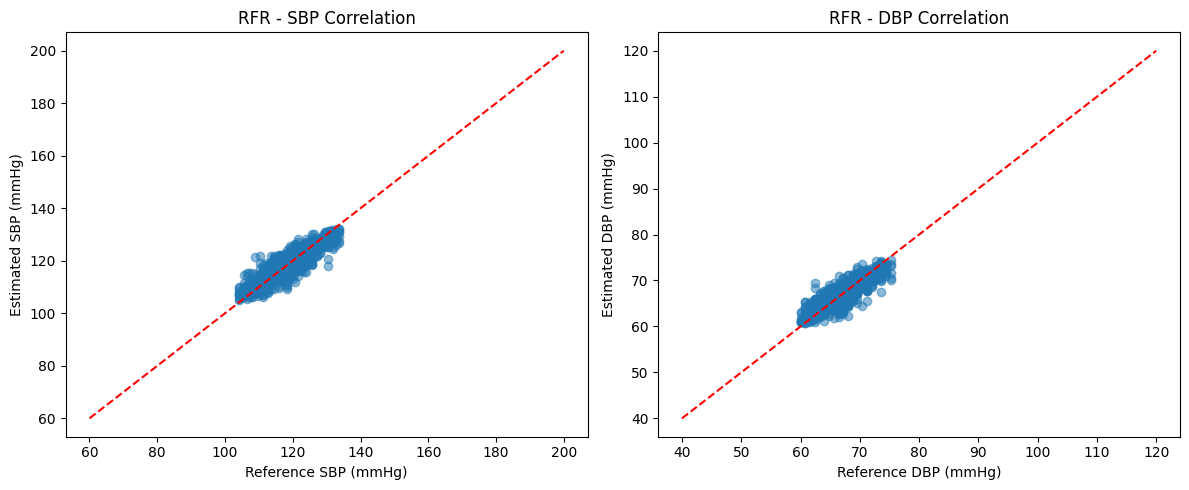


GBR Results:
SBP R² Score: 0.805
DBP R² Score: 0.772
SBP MAE: 2.44 mmHg
DBP MAE: 1.33 mmHg
SBP Correlation: 0.897
DBP Correlation: 0.878


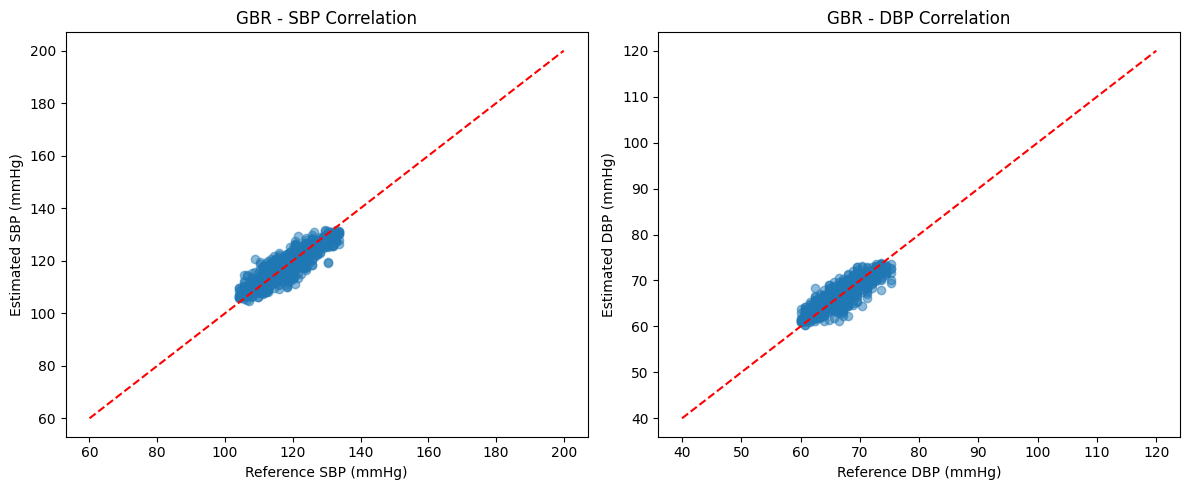


ABR Results:
SBP R² Score: 0.731
DBP R² Score: 0.694
SBP MAE: 3.01 mmHg
DBP MAE: 1.63 mmHg
SBP Correlation: 0.869
DBP Correlation: 0.850


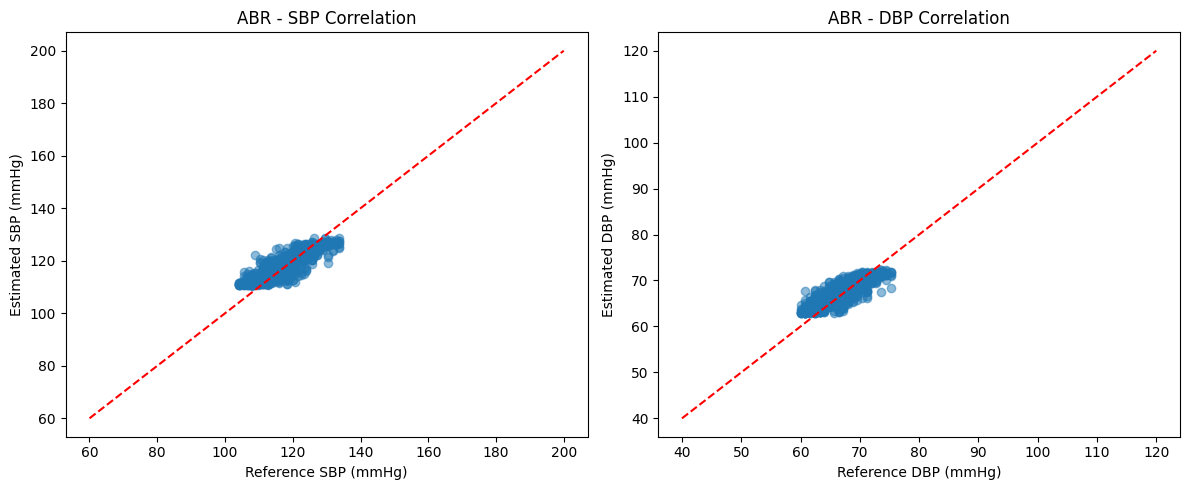


MLP Results:
SBP R² Score: 0.818
DBP R² Score: 0.782
SBP MAE: 2.38 mmHg
DBP MAE: 1.29 mmHg
SBP Correlation: 0.905
DBP Correlation: 0.886


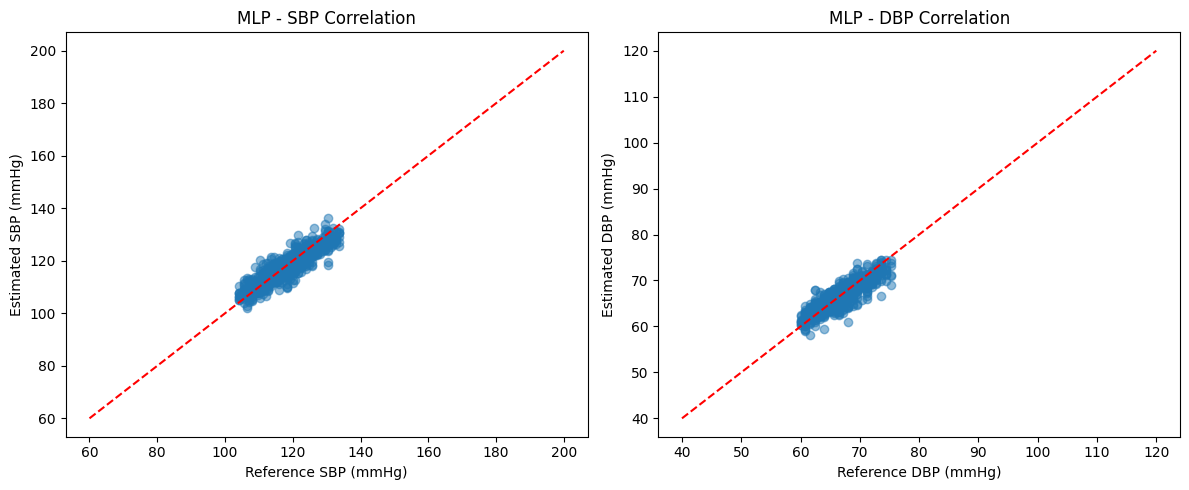

In [8]:



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

class BPEstimator:
    def __init__(self):
        self.models = {
            'rfr': RandomForestRegressor(n_estimators=100, random_state=42),
            'gbr': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'abr': AdaBoostRegressor(n_estimators=100, random_state=42),
            'mlp': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
        }
        self.scaler = StandardScaler()

    def prepare_data(self, data_path):
        # Load and prepare features
        df = pd.read_csv(data_path)

        features = ['systolic_peak', 'dicrotic_peak',
                    'diastolic_point1', 'diastolic_point2', 'dicrotic_notch',
                    'max_slope', 'augmentation_index', 'T1', 'T2', 'T3']

        print(df[['systolic_ref_mmHg', 'diastolic_ref_mmHg']].describe())


        systolic_min = df['systolic_ref_mmHg'].quantile(0.05)  # 1st percentile
        systolic_max = df['systolic_ref_mmHg'].quantile(0.95)  # 99th percentile
        diastolic_min = df['diastolic_ref_mmHg'].quantile(0.05)
        diastolic_max = df['diastolic_ref_mmHg'].quantile(0.95)



        print("systolic_min = ",systolic_min)
        print("systolic_max = ",systolic_max)
        print("diastolic_min = ",diastolic_min)
        print("diastolic_max = ",diastolic_max )

        df = df[(df['systolic_ref_mmHg'] >= systolic_min) & (df['systolic_ref_mmHg'] <= systolic_max)]
        df = df[(df['diastolic_ref_mmHg'] >= diastolic_min) & (df['diastolic_ref_mmHg'] <= diastolic_max)]

        print("head of filtered data = ",df.head())
        X = df[features]
        y_sbp = df['systolic_ref_mmHg']
        y_dbp = df['diastolic_ref_mmHg']
        # First split: separate test set
        X_temp, X_test, y_sbp_temp, y_sbp_test, y_dbp_temp, y_dbp_test = train_test_split(
            X, y_sbp, y_dbp, test_size=0.2, random_state=42)

        # Second split: separate validation set from training set
        X_train, X_val, y_sbp_train, y_sbp_val, y_dbp_train, y_dbp_val = train_test_split(
            X_temp, y_sbp_temp, y_dbp_temp, test_size=0.25, random_state=42)

        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_val_scaled = self.scaler.transform(X_val)
        X_test_scaled = self.scaler.transform(X_test)

        return (X_train_scaled, X_val_scaled, X_test_scaled,
                y_sbp_train, y_sbp_val, y_sbp_test,
                y_dbp_train, y_dbp_val, y_dbp_test)

    def train_and_evaluate(self, X_train, X_val, X_test, y_sbp_train, y_sbp_val,
                          y_sbp_test, y_dbp_train, y_dbp_val, y_dbp_test):
        results = {}
        predictions = {}

        for name, model in self.models.items():
            # Train SBP model
            sbp_model = model.fit(X_train, y_sbp_train)
            sbp_pred_test = sbp_model.predict(X_test)

            # Train DBP model
            dbp_model = model.fit(X_train, y_dbp_train)
            dbp_pred_test = dbp_model.predict(X_test)

            # Calculate metrics
            sbp_r2 = r2_score(y_sbp_test, sbp_pred_test)
            dbp_r2 = r2_score(y_dbp_test, dbp_pred_test)
            sbp_mae = mean_absolute_error(y_sbp_test, sbp_pred_test)
            dbp_mae = mean_absolute_error(y_dbp_test, dbp_pred_test)
            sbp_corr = pearsonr(y_sbp_test, sbp_pred_test).statistic
            dbp_corr = pearsonr(y_dbp_test, dbp_pred_test).statistic

            results[name] = {
                'sbp_r2': sbp_r2,
                'dbp_r2': dbp_r2,
                'sbp_mae': sbp_mae,
                'dbp_mae': dbp_mae,
                'sbp_corr': sbp_corr,
                'dbp_corr': dbp_corr
            }

            predictions[name] = {
                'sbp_true': y_sbp_test,
                'sbp_pred': sbp_pred_test,
                'dbp_true': y_dbp_test,
                'dbp_pred': dbp_pred_test
            }

        return results, predictions

def plot_correlation(predictions, model_name):
    plt.figure(figsize=(12, 5))

    # SBP correlation plot
    plt.subplot(1, 2, 1)
    plt.scatter(predictions[model_name]['sbp_true'],
               predictions[model_name]['sbp_pred'], alpha=0.5)
    plt.plot([60, 200], [60, 200], 'r--')
    plt.xlabel('Reference SBP (mmHg)')
    plt.ylabel('Estimated SBP (mmHg)')
    plt.title(f'{model_name.upper()} - SBP Correlation')

    # DBP correlation plot
    plt.subplot(1, 2, 2)
    plt.scatter(predictions[model_name]['dbp_true'],
               predictions[model_name]['dbp_pred'], alpha=0.5)
    plt.plot([40, 120], [40, 120], 'r--')
    plt.xlabel('Reference DBP (mmHg)')
    plt.ylabel('Estimated DBP (mmHg)')
    plt.title(f'{model_name.upper()} - DBP Correlation')

    plt.tight_layout()
    plt.show()

def main():
    estimator = BPEstimator()
    data_splits = estimator.prepare_data('processed_features.csv')
    results, predictions = estimator.train_and_evaluate(*data_splits)

    # Print results
    for model_name, metrics in results.items():
        print(f"\n{model_name.upper()} Results:")
        print(f"SBP R² Score: {metrics['sbp_r2']:.3f}")
        print(f"DBP R² Score: {metrics['dbp_r2']:.3f}")
        print(f"SBP MAE: {metrics['sbp_mae']:.2f} mmHg")
        print(f"DBP MAE: {metrics['dbp_mae']:.2f} mmHg")
        print(f"SBP Correlation: {metrics['sbp_corr']:.3f}")
        print(f"DBP Correlation: {metrics['dbp_corr']:.3f}")

        # Plot correlation for each model
        plot_correlation(predictions, model_name)

if __name__ == "__main__":
    main()


R-squared for Systolic Pressure Prediction: 0.874
R-squared for Diastolic Pressure Prediction: 0.805


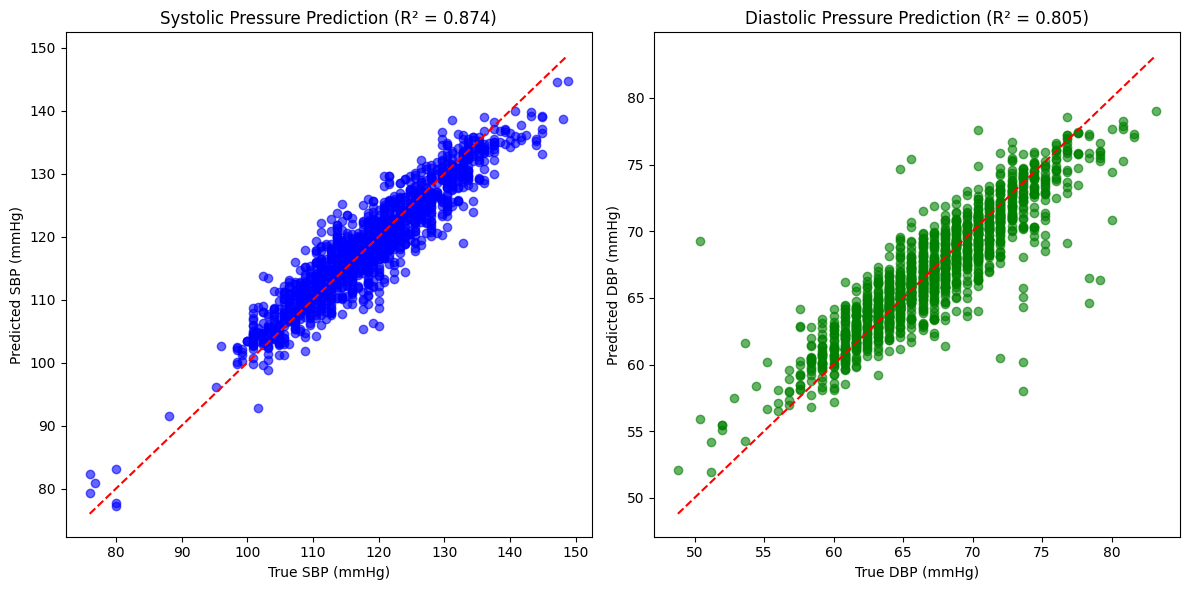

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the data
file_path = 'processed_features.csv'
data = pd.read_csv(file_path)

# Specify feature columns and target columns
feature_columns = [
    'heart_rate', 'systolic_peak', 'dicrotic_peak',
    'diastolic_point1', 'diastolic_point2', 'dicrotic_notch',
    'max_slope', 'augmentation_index', 'T1', 'T2', 'T3'
]
target_columns = ['systolic_ref_mmHg', 'diastolic_ref_mmHg']

# Prepare features and targets
X = data[feature_columns]
y_sbp = data['systolic_ref_mmHg']
y_dbp = data['diastolic_ref_mmHg']

# Split data into training and testing sets
X_train, X_test, y_sbp_train, y_sbp_test, y_dbp_train, y_dbp_test = train_test_split(
    X, y_sbp, y_dbp, test_size=0.4, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train Gradient Boosting Regressors
gbr_sbp = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_dbp = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr_sbp.fit(X_train_scaled, y_sbp_train)
gbr_dbp.fit(X_train_scaled, y_dbp_train)

# Make predictions
y_sbp_pred = gbr_sbp.predict(X_test_scaled)
y_dbp_pred = gbr_dbp.predict(X_test_scaled)

# Evaluate R-squared scores
r2_sbp = r2_score(y_sbp_test, y_sbp_pred)
r2_dbp = r2_score(y_dbp_test, y_dbp_pred)

print(f"R-squared for Systolic Pressure Prediction: {r2_sbp:.3f}")
print(f"R-squared for Diastolic Pressure Prediction: {r2_dbp:.3f}")

# Plot R-squared plots
plt.figure(figsize=(12, 6))

# Systolic Pressure
plt.subplot(1, 2, 1)
plt.scatter(y_sbp_test, y_sbp_pred, alpha=0.6, color='blue')
plt.plot([y_sbp_test.min(), y_sbp_test.max()], [y_sbp_test.min(), y_sbp_test.max()], 'r--')
plt.xlabel('True SBP (mmHg)')
plt.ylabel('Predicted SBP (mmHg)')
plt.title(f'Systolic Pressure Prediction (R² = {r2_sbp:.3f})')

# Diastolic Pressure
plt.subplot(1, 2, 2)
plt.scatter(y_dbp_test, y_dbp_pred, alpha=0.6, color='green')
plt.plot([y_dbp_test.min(), y_dbp_test.max()], [y_dbp_test.min(), y_dbp_test.max()], 'r--')
plt.xlabel('True DBP (mmHg)')
plt.ylabel('Predicted DBP (mmHg)')
plt.title(f'Diastolic Pressure Prediction (R² = {r2_dbp:.3f})')

plt.tight_layout()
plt.show()
